## FROM COMPLEXITY TO INTELLIGENCE (ATHENS WEEK) TPT37 
#### GHRIBI SAIF EDDINE 

## <center style="color:blue">  Elbow method vs Global complexity to choose the number of clusters in k-means</center>

#  <font color='green'>I.Preliminary functions </font>

## I.0. Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.optimize import fmin_bfgs
from collections import Counter
from clustering import compareComplexitiesWithKMeans as compareComplexity #(Code from lab 4)
from sklearn.datasets import load_iris, make_moons, make_blobs, load_wine

# I.1. 4 data sets will be used in this presentation :


### <font color="purple">Sklearn Iris </font> : This data sets consists of 3 different types of irises.<br>
###  <font color="purple">Sklearn Make Moons </font> : Make two interleaving half circles. <br>
###  <font color="purple">Sklearn Make_blobs </font> : Generate isotropic Gaussian blobs for clustering. <br>
###  <font color="purple">Sklearn Wine data </font> :The wine dataset is a classic and very easy multi-class classification dataset. 


## I.2. Store data used for comparison

In [2]:
def data(index):
    dictionary = {}  # dictionary to store data
    d = load_iris()
    X = d['data']
    dictionary["iris"] = X  # add iris data (index "iris")
    X, y = make_moons(noise=.05, random_state=1)
    dictionary["moons"] = X
    X, y = make_blobs(random_state=1)
    dictionary["blobs"] = X
    d = load_wine()
    dictionary["wine"] = d['data']
    return dictionary[index]

## I.3. function to Calculate the global complexity and the elbow method for a given data set 

In [3]:
def eval_complex(max_clusters, data_index):
    # list to store Sum of squared distances of samples to their closest cluster center.
    l_elbow = []
    # list to store the general complexity
    l_kolo = []
    for i in range(1, max_clusters):
        # choose data
        X = data(data_index)
        # fit model (k-means)
        kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
        # global complexity after K-Means using the function compareComplexitiesWithKMeans(Data,K) from the lab session
        Cmatrix, global_complexity = compareComplexity(X, i)
        # store the values in corresponding lists
        l_elbow.append(kmeans.inertia_)
        l_kolo.append(global_complexity)
    return l_elbow, l_kolo

# <font color='green'> II. Elbow method </font>

    

###  The elbow method is used to determine the optimal number of clusters in k-means.<br>
###  if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids.<br>
###  The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.<br>
 ### the distortion function here is considered as the Sum of squared distances of samples to their closest cluster center.



## I.1 example of elbow point using Iris data 

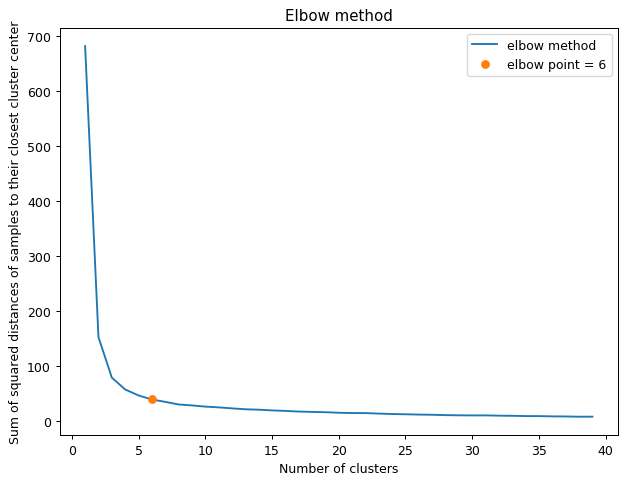

In [5]:
# fix the figure size
max_clusters=40
figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')
l_elbow, l_kolo = eval_complex(max_clusters, "iris")
plt.plot(range(1, max_clusters), l_elbow, label="elbow method")
plt.plot(6, l_elbow[5], "o", label="elbow point = 6")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances of samples to their closest cluster center")
plt.title("Elbow method")
plt.legend()

# <font color='green'> III. Global complexity vs Elbow method  </font>

## III.1 What is the global complexity ?
### As defined in the fourth lab "Machine learning as compression"
### <font color="purple">This complexity is determined through this forumla <font>:
###  $ Global complexity =Complexity(Data|Protoypes) +complexity(Protoypes)$ 


## III.2 Comparison and Visualization 

In [6]:
# function to plot the comparison
def plot(max_clusters, data_name):
    # retrieve the two lists of elbow method and global complexity to plot
    l_elbow, l_kolo = eval_complex(max_clusters, data_name)
    # fix the figure size
    fig, ax1 = plt.subplots(figsize=(12, 8))
    # use subplot to show the two plots according to their scales.
    # plot the global complexity
    ax1.set_xlabel("Number of clusters K")
    ax1.set_ylabel('Global Complexity', color='red')
    ax1.plot(range(1, max_clusters), l_kolo, color="red")
    # plot the minimum of global complexity
    ax1.plot(np.argmin(l_kolo)+1, l_kolo[np.argmin(l_kolo)],
             "o", label="min complexity="+str(np.argmin(l_kolo)+1))
    ax1.legend()
    # plot the elbow method which is Sum of squared distances of samples to their closest cluster center.
    ax2 = ax1.twinx()
    ax2.set_ylabel(' Elbow Method', color='green')
    ax2.plot(range(1, max_clusters), l_elbow, color="green")
    # plot the title of the plot accordinf the data used
    fig.suptitle("Data:"+data_name, size=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)

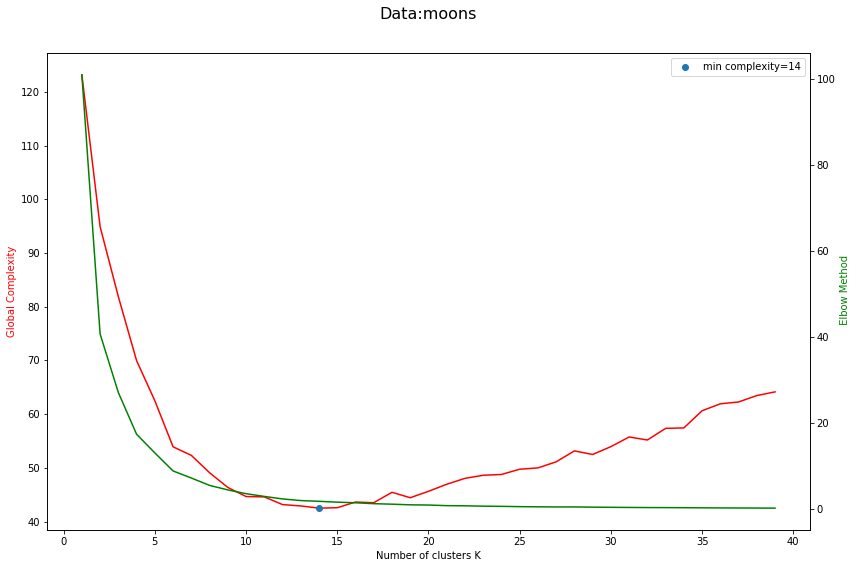

In [7]:
plot(40,"moons")

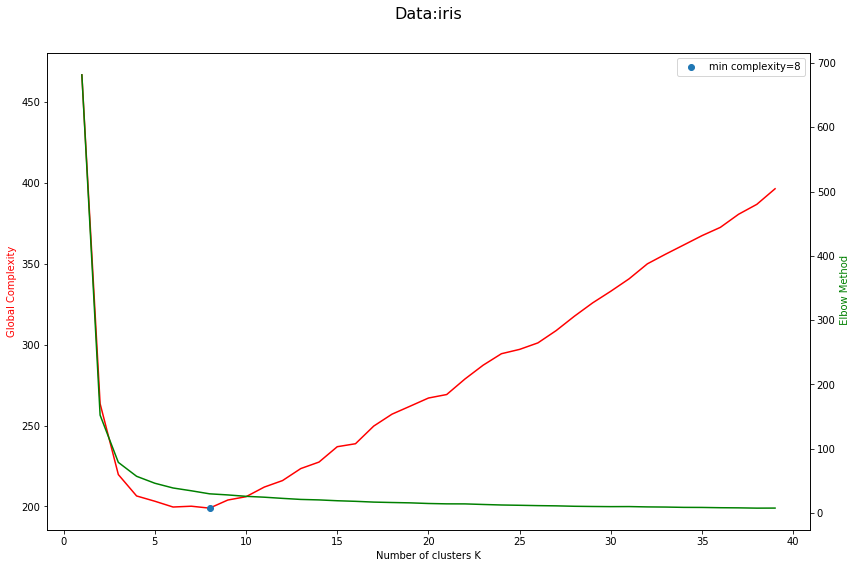

In [8]:
plot(40,"iris")

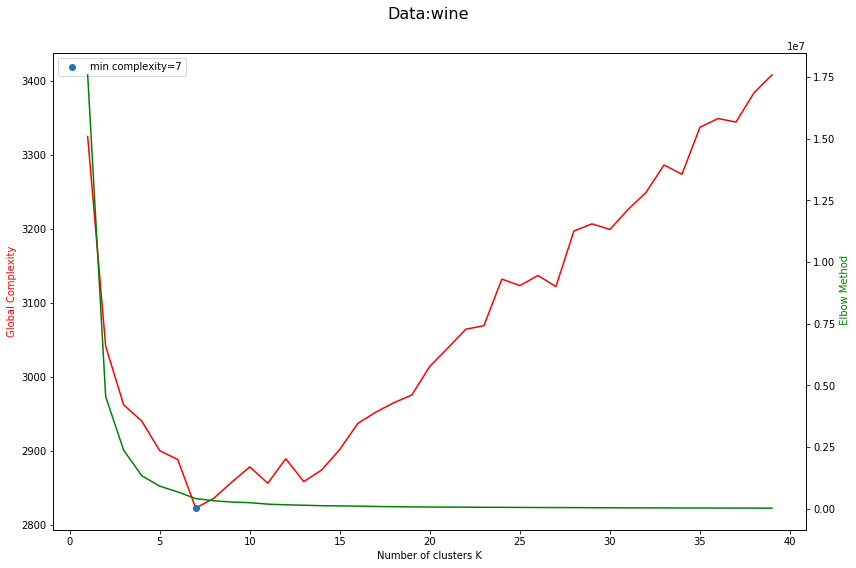

In [9]:
plot(40,"wine")

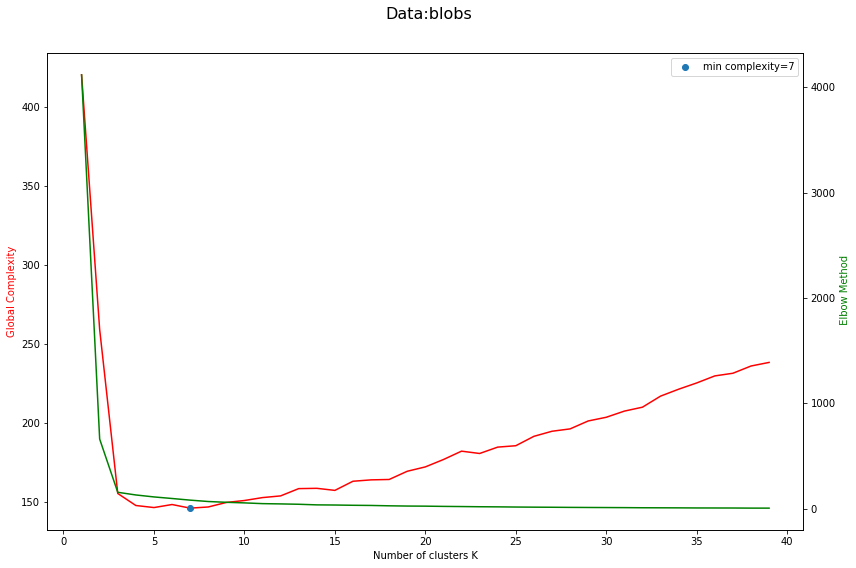

In [10]:
plot(40,"blobs")

## <font color="green">IV.Conclusion:<font>
###  We notice that the minimum of complexity is very close to what we choose with the elbow method .<br>
###  We can thus use the complexity theory in next machine learning projects.So this method could be the new elbow method.<br>
###  Could this be used in all cases which means the number k of clusters will not be a hyper-parameter anymore   the answer could be the subject of an interesting research.
    